# Lecture 13: Stochastic models

### Today's question:

* Can we forecast future values based on past ones?


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import scipy

from scipy import signal
from scipy.io import wavfile

import warnings
warnings.filterwarnings('ignore')

## Stochastic models

Say you want to extend a given time series into the future with the same statistical characteristics.

For **purely random time series** (i.e. stationary and independent) with a known probability distribution, all you need to do is estimate the parameters from the time series, and draw new samples from the obtained distribution.

For **stationary time series** (possibly with memory) you need to take into account the relation between samples in the sequence. Different models for this case exist:

### Autoregressive (AR) model

In an autoregressive model, a time series $y_t$ is **modelled as a function of its own past values** and a random term.

The general form of the p-th order AR model is

$$ y_t = \mu + \sum_{i=1}^p \beta_i (y_{t-i}-\mu) + \epsilon_t $$

where $\mu$ is the mean of the time series, $\beta_i$ are regression coefficients, and $\epsilon_t$ is the prediction error (i.e. the stochastic part of the model), typically assumed $\sim N(0,\sigma_\epsilon^2)$.

The **first-order AR model (Markov model, AR(1))** has found particular application in hydrology for modelling annual mean discharge. It has three parameters ($\mu$, $\beta_1$, $\sigma_\epsilon^2$).

The parameters can be related to the autocorrelation coefficients (Yule-Walker equation):

$$ r_L = \sum_{j=1}^p \beta_j r_{L-j} $$

So for the first-order AR model we would get:

$$ \hat{\beta_1} = r_1 $$

$$ \hat{\sigma_\epsilon^2}= \sigma_y^2 (1-\beta_1^2) $$

$$ \hat{\mu_{}} = \bar{y_{}} = \frac{1}{n} \sum y_i $$

To extend a time series with the AR(1) model, you would

* estimate $\mu$, $\beta_1$, $\sigma_\epsilon^2$

* select a $z_t$ from N(0,1) for the random term

* select an initial value for $y_{t-1}$

* calculate $ y_t = \mu_y + \beta_1 (y_{t-1}-\mu_y) + z_t \sigma_y \sqrt{1-\beta_1^2} $

* delete the first 50 values to get rid of the influence from the initial value

In [2]:
rate, audio = wavfile.read('a2002011001-e02.wav')
audio = np.mean(audio, axis=1) #make it mono


# let's extend a part of the audio sample, assuming it's stationary
audio=audio[-2000:-1000]

mu=np.mean(audio)
print(mu)

def autocorr(x, t=1):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))[1,0]

beta1=autocorr(audio)
print(beta1)

sigma2_eps=np.var(audio)*(1-beta1**2)
print(sigma2_eps)


4.8285
0.9980797930377698
0.9906422190951081


In [3]:
# let's start with the last value of the sample

y=audio.tolist()
for t in np.arange(len(y),len(y)+5000):
    y.append( mu + beta1*(y[t-1]-mu) + np.random.normal(loc=0,scale=1)*np.sqrt(sigma2_eps))


<IPython.core.display.Javascript object>


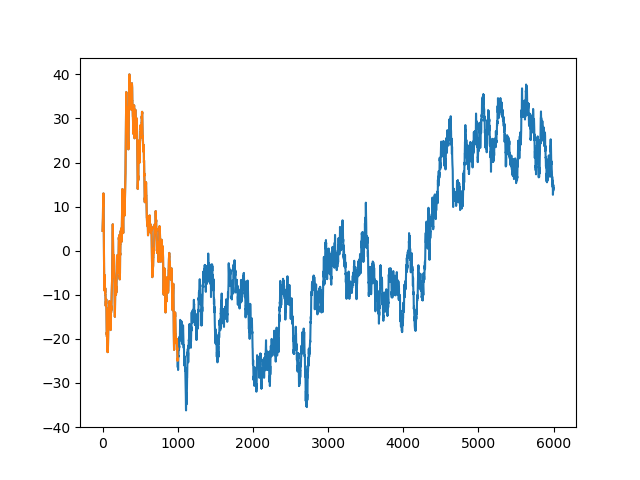

In [4]:
plt.plot(y)
plt.plot(audio)


In [ ]:
wavfile.write('y.wav', rate, np.array(y))
